<p>

</p>


**<h1> CSC467 - Module 3 Assignment </h1>**


<h2>Objectives</h2>


This assignment covers key concepts in feature extraction and image alignment using OpenCV.

It consists of three main parts:

- Harris Corner Detector - Implement the Harris Corner Detector and evaluate it on selected
images.

- Scale Invariance - Explore scale selection using Laplacian and Difference of Gaussian operators.

- RANSAC - Solve for an affine transformation between a pair of images using the RANSAC fitting algorithm.


----


Requirements

You should perform this assignment using Python and OpenCV. Submit all your source code, result

images, and explanations.

Ensure that your code is well-commented for clarity. If you need assistance, refer to OpenCV

documentation and relevant online tutorials.


## Harris Corner Detection [ 30% ]


Implement the Harris Corner Detector using OpenCV's cv2.cornerHarris function.

Steps:

1. Convert the input image **(cameraman.jpg)** to grayscale.

2. Compute image gradients using `cv2.Sobel.`

3. Compute the Harris response using `cv2.cornerHarris.`

4. Apply non-maximum suppression and thresholding.

5. Display the image with detected corners.

Apply this function to cameraman.jpg and save the output figure.

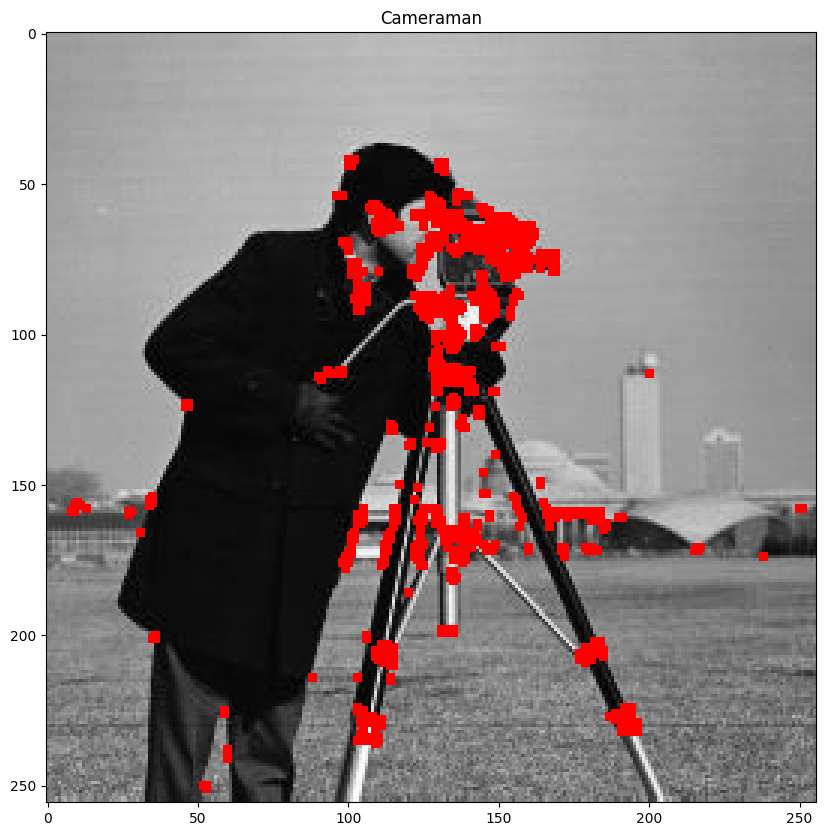

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

img = cv2.imread('cameraman.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)


dst = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)

dst = cv2.dilate(dst, None)

cameraman = img.copy()
cameraman[dst > 0.01 * dst.max()] = [0, 0, 255]

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cameraman, cv2.COLOR_BGR2RGB))
plt.title("Cameraman")
plt.show()

## Scale Invariance [ 30% ]


Analyze scale selection using the Laplacian and Difference of Gaussian (DoG) operators.

Use OpenCV functions such as` cv2.Laplacian` and Gaussian Pyramid methods.

1. Load cameraman.jpg and select a feature-rich region.

2. Compute the Laplacian and normalized Laplacian at multiple scales.

3. Plot the scale-normalized response over different scales.

4. Display the image with the selected keypoint and the corresponding detected scale.


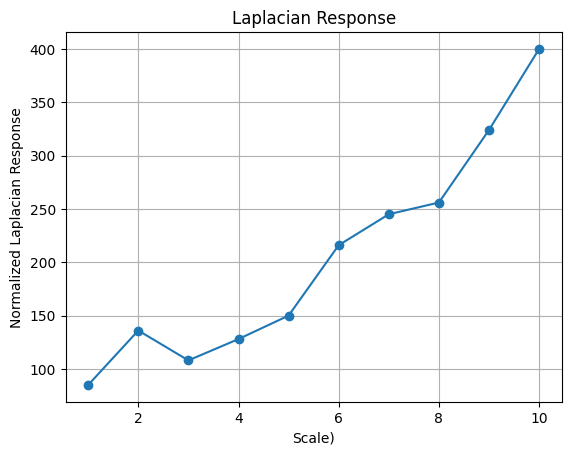

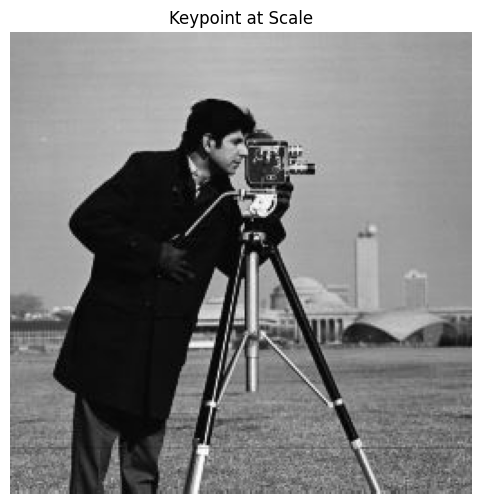

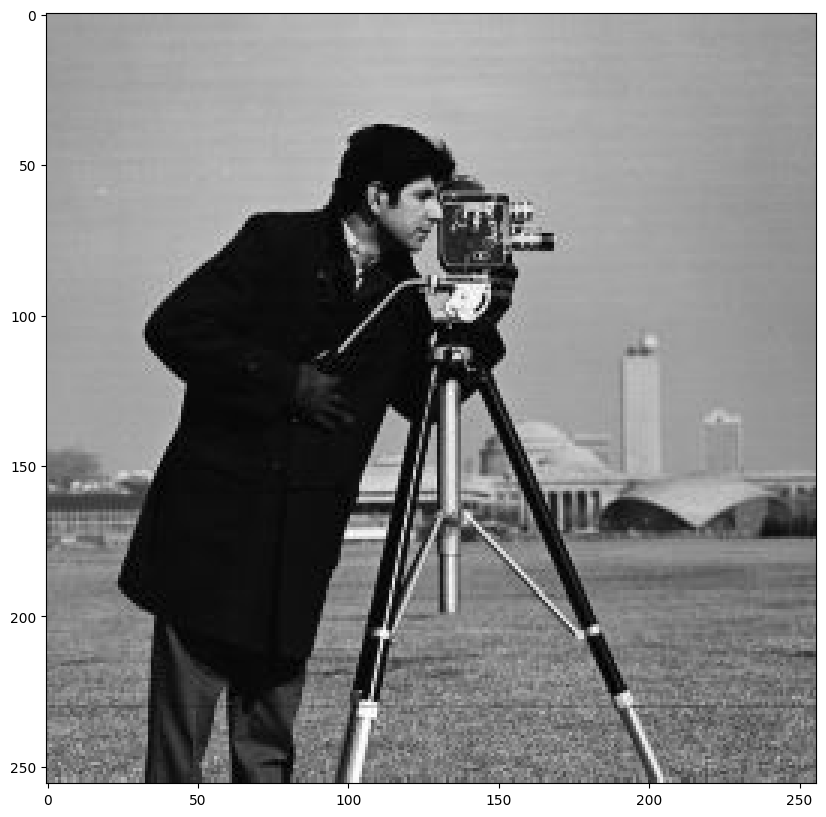

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


image = cv2.imread("cameraman.jpg")

x, y, w, h = 100, 100, 60, 60
region = image[y:y+h, x:x+w]

scales = np.linspace(1.0, 10.0, num=10)
responses = []
for sigma in scales:
   region_gray = cv2.cvtColor(region, cv2.COLOR_BGR2GRAY)
   blur = cv2.GaussianBlur(region_gray, (0,0), sigmaX=sigma, sigmaY=sigma)
   lap = cv2.Laplacian(blur, cv2.CV_64F)
   norm_resp = sigma**2 * np.abs(lap)
   responses.append(norm_resp.max())


plt.figure()
plt.plot(scales, responses, marker='o')
plt.xlabel('Scale)')
plt.ylabel('Normalized Laplacian Response')
plt.title('Laplacian Response')
plt.grid(True)
plt.show()

img_marked = image.copy()

#img_marked = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_marked, cv2.COLOR_BGR2RGB))
plt.title('Keypoint at Scale')
plt.axis('off')
plt.show()


plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

 ## Image Alignment using RANSAC [ 40% ]


Implement an affine transformation estimation using RANSAC in OpenCV.

Steps:

1. Extract keypoints and descriptors using OpenCV's SIFT or ORB.

2. Match features between two images using cv2.BFMatcher.

3. Estimate the transformation matrix using cv2.findHomography with RANSAC.

4. Warp one image to align with the other using cv2.warpPerspective.

5. Display and save the transformed image.

Use cameraman.jpg and another transformed version of it for this task.


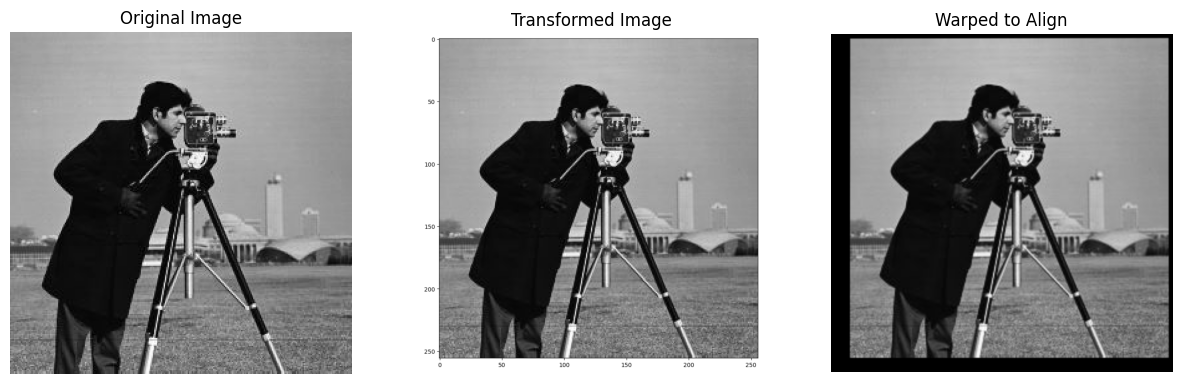

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


image = cv2.imread("cameraman.jpg")
transformed_image = cv2.imread('cameraman_transformed.png')

gray1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(transformed_image, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)


bf = cv2.BFMatcher()
raw_matches = bf.knnMatch(des1, des2, k=2)
good_matches = [m for m,n in raw_matches if m.distance < 0.75 * n.distance]

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1,1,2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)


h2, w2 = transformed_image.shape[:2]
warped = cv2.warpPerspective(image, H, (w2, h2))

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB))
plt.title('Transformed Image')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(warped, cv2.COLOR_BGR2RGB))
plt.title('Warped to Align')
plt.axis('off')
plt.show()




#upper = 150
#lower = 400
#crop_top = image[upper: lower,:,:]
#plt.figure(figsize=(10,10))
#plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB))
#plt.show()